In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Daten zu terrorangriffen laden
df_attacks = pd.read_excel('data/globalterrorismdb_0522dist.xlsx')

In [4]:
# Daten zu politischer Stabilität einlesen
df_stability = pd.read_excel('data\API_PV.PER.RNK_DS2_en_excel_v2_10224.xlsx', sheet_name='Data', skiprows=3)

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\elias\AppData\Local\Temp\ipykernel_19728\624851410.py:2: SyntaxWarning: invalid escape sequence '\A'
  df_stability = pd.read_excel('data\API_PV.PER.RNK_DS2_en_excel_v2_10224.xlsx', sheet_name='Data', skiprows=3)


In [5]:
# Daten zur politischen Stabilität anzeigen
df_stability.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,92.380951,92.380951,93.333336,95.238098,95.283020,95.754715,96.226418,97.169815,97.641510,NaN
1,Africa Eastern and Southern,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,2.857143,0.952381,0.952381,0.476190,0.471698,0.943396,0.471698,1.415094,0.471698,NaN
3,Africa Western and Central,AFW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,32.857143,28.095238,33.333332,30.476191,34.905659,31.603773,24.528301,21.226416,22.641510,NaN


In [6]:
# pivotieren der Daten so dass jedes Jahr eine separate Zeile hat
df_stability_pivoted = df_stability.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
                       var_name="Year", 
                       value_name="Value")

# daten anzeigen
df_stability_pivoted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
1,Africa Eastern and Southern,AFE,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
3,Africa Western and Central,AFW,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN
4,Angola,AGO,Political Stability and Absence of Violence/Te...,PV.PER.RNK,1960,NaN


In [7]:
# Daten so umwandeln, dass nur die Spalte "Country Name", "Year" und "Value" übrig bleiben
df_stability_pivoted = df_stability_pivoted[["Country Name", "Year", "Value"]]

# Spalten "Value" umbenennen in "Political Stability and Absence of Violence"
df_stability_pivoted.rename(columns={"Value": "Political Stability and Absence of Violence"}, inplace=True)

# Spalte "Year" in Integer umwandeln
df_stability_pivoted['Year'] = df_stability_pivoted['Year'].astype(int)

# Daten anzeigen
df_stability_pivoted.head()

,Country Name,Year,Political Stability and Absence of Violence
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [8]:
# Extrahiere die eindeutigen Ländernamen
attacks_countries = set(df_attacks['country_txt'].unique())
stability_countries = set(df_stability_pivoted['Country Name'].unique())

# Identifiziere Abweichungen
mismatched_countries = stability_countries.difference(attacks_countries)
print("Nicht übereinstimmende Ländernamen in df3_pivoted:", mismatched_countries)

# identifiziere Ländernamen die in df_merged fehlen
mismatched_countries2 = attacks_countries.difference(stability_countries)
print("Nicht übereinstimmende Ländernamen in df:", mismatched_countries2)

Nicht übereinstimmende Ländernamen in df3_pivoted: {'Middle income', 'Latin America & Caribbean (excluding high income)', 'Iran, Islamic Rep.', 'American Samoa', 'Kyrgyz Republic', 'Africa Eastern and Southern', 'Viet Nam', 'Pacific island small states', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)', 'Syrian Arab Republic', 'East Asia & Pacific (excluding high income)', 'Sub-Saharan Africa (excluding high income)', 'Europe & Central Asia (excluding high income)', 'Bahamas, The', 'Late-demographic dividend', 'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Puerto Rico', 'Africa Western and Central', 'Mongolia', 'Low & middle income', 'Liechtenstein', 'Bosnia and Herzegovina', 'Korea, Rep.', 'Eswatini', 'IBRD only', 'Fragile and conflict affected situations', 'Middle East & North Africa', 'St. Vincent and the Grenadines', "Cote d'Ivoire", 'North America', 'Isle of Man', 'Venezuela, RB', 'Turks and Caicos Island

In [9]:
# Mapping der Ländernamen in df3_pivoted zu den Ländernamen in df
country_mapping = {
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Republic of the Congo',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Venezuela, RB': 'Venezuela',
    'Yemen, Rep.': 'Yemen',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Tukiye': 'Turkey',
    'Venecuela, RB': 'Venezuela',
    'Gambia, The': 'Gambia',
    'West Bank and Gaza' : 'West Bank and Gaza Strip',
    'Bahamas, The': 'Bahamas',
    'Czechnia': 'Czech Republic',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'Viet Nam': 'Vietnam',
    'North Macedonia': 'Macedonia',
    'Hong Kong SAR, China': 'Hong Kong',
    'Syrian Arab Republic': 'Syria',
    'Brunei Darussalam': 'Brunei',
    'Timor-Leste': 'East Timor',
    'Lao PDR': 'Laos',
}

# Mapping der Ländernamen in df3_pivoted
df_stability_pivoted['Country Name'] = df_stability_pivoted['Country Name'].replace(country_mapping)

In [10]:
# Vollständiges Raster aus Ländern, Jahren und Monaten erstellen
countries = df_attacks["country_txt"].unique()  # Alle Länder
years = range(2000, 2021)  # Alle Jahre von 2000 bis 2020

# Erstellen eines multidimensionalen Index aus Ländern und Jahren
index = pd.MultiIndex.from_product([countries, years], names=["Country Name", "Year"])
full_df = pd.DataFrame(index=index).reset_index()

# Zusammenführen der Daten
df_merged = pd.merge(full_df, df_stability_pivoted, on=["Country Name", "Year"], how="left")

# Alle Zeilen mit fehlenden Werten in der Spalte "Political Stability and Absence of Violence" entfernen
df_merged = df_merged.dropna(subset=["Political Stability and Absence of Violence"])

# Daten anzeigen
df_merged.head(20)

,Country Name,Year,Political Stability and Absence of Violence
0,Dominican Republic,2000,44.973545
2,Dominican Republic,2002,48.677250
3,Dominican Republic,2003,31.658291
4,Dominican Republic,2004,33.495144
5,Dominican Republic,2005,38.349514
6,Dominican Republic,2006,42.028984
7,Dominican Republic,2007,40.096619
8,Dominican Republic,2008,42.788460
9,Dominican Republic,2009,44.549763
10,Dominican Republic,2010,44.549763


In [11]:
# Wirtschaftsdaten zu jedem Land und Jahr einlesen.
df_gdp = pd.read_excel('data\P_Data_Extract_From_World_Development_Indicators.xlsx')

# df4 anzeigen
df_gdp.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\elias\AppData\Local\Temp\ipykernel_19728\4160984081.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_gdp = pd.read_excel('data\P_Data_Extract_From_World_Development_Indicators.xlsx')


,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,...,626.512929,566.88113,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,..
1,Afghanistan,AFG,Military expenditure (current USD),MS.MIL.XPND.CD,2939585.501254,..,..,3341271.55123,3581366.35143,4203664.568655,...,268238787.719988,199517108.764826,185878310.062383,191407113.244397,198074728.574408,226306243.729258,279576954.925193,278250788.014927,..,..
2,Afghanistan,AFG,"Net trade in goods and services (BoP, current ...",BN.GSR.GNFS.CD,..,..,..,..,..,..,...,-6261263543.711,-7044964161.23314,-6191463867.404961,-6803560118.47488,-6378166942.375891,-5855061056.028919,-5506547001.36988,..,..,..
3,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,...,7.915,..,..,11.184,..,..,11.71,5.679,..,..
4,Afghanistan,AFG,"International tourism, expenditures (current US$)",ST.INT.XPND.CD,..,..,..,..,..,..,...,140000000,151000000,89000000,130000000,226000000,168000000,49000000,..,..,..


In [12]:
# Umwandlung des DataFrames in ein langes Format (von "wide" zu "long")
df_gdp_melted = df_gdp.melt(id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
                    var_name="Year", 
                    value_name="Value")

# Extrahiere die Jahreszahlen aus der 'Year' Spalte und konvertiere sie zu Integern
df_gdp_melted['Year'] = df_gdp_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Pivotieren des DataFrames, sodass jedes Jahr eine separate Zeile hat
df_gdp_pivoted = df_gdp_melted.pivot_table(index=["Country Name", "Country Code", "Year"], 
                                     columns=["Series Name"], 
                                     values="Value", 
                                     aggfunc="first")

# Reset der Indexes und Aufräumen der Datenstruktur
df_gdp_pivoted.reset_index(inplace=True)

# Erste Zeilen anzeigen
df_gdp_pivoted.head()

Series Name,Country Name,Country Code,Year,Ease of doing business score (0 = lowest performance to 100 = best performance),GDP per capita (current US$),"International tourism, expenditures (% of total imports)","International tourism, expenditures (current US$)",Military expenditure (% of GDP),Military expenditure (current USD),"Net trade in goods and services (BoP, current US$)","Unemployment, total (% of total labor force) (national estimate)"
0,Afghanistan,AFG,1970,..,..,..,..,1.629606,2939585.501254,..,..
1,Afghanistan,AFG,1971,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,1972,..,..,..,..,..,..,..,..
3,Afghanistan,AFG,1973,..,..,..,..,1.86891,3341271.55123,..,..
4,Afghanistan,AFG,1974,..,..,..,..,1.610825,3581366.35143,..,..


In [13]:
# Nur Jahre 2000 bis 2022 behalten
df_gdp_pivoted = df_gdp_pivoted[(df_gdp_pivoted['Year'] >= 2000) & (df_gdp_pivoted['Year'] <= 2022)]

# Mapping der Ländernamen in df4_pivoted zu den Ländernamen in df
df_gdp_pivoted['Country Name'] = df_gdp_pivoted['Country Name'].replace(country_mapping)

# Nur die Spalten "Country Name", "Year" und "GDP (current US$)" behalten
df_gdp_pivoted = df_gdp_pivoted[["Country Name", "Year", "GDP per capita (current US$)"]]

#  Zeilen in denen "GDP per capita (current US$)" '..' ist entfernen
df_gdp_pivoted = df_gdp_pivoted[df_gdp_pivoted['GDP per capita (current US$)'] != '..']

# Spalte "GDP per capita (current US$)" in Float umwandeln
df_gdp_pivoted['GDP per capita (current US$)'] = df_gdp_pivoted['GDP per capita (current US$)'].astype(float)

# df_merged und df4_pivoted zusammenführen
df_merged = df_merged.merge(df_gdp_pivoted, how='left', left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'])

# Zeilen mit fehlenden Werten in der Spalte "GDP per capita (current US$)" entfernen
df_merged = df_merged.dropna(subset=['GDP per capita (current US$)'])

# df_merged anzeigen
df_merged.head()

,Country Name,Year,Political Stability and Absence of Violence,GDP per capita (current US$)
0,Dominican Republic,2000,44.973545,2845.846553
1,Dominican Republic,2002,48.677250,3085.517811
2,Dominican Republic,2003,31.658291,2399.498091
3,Dominican Republic,2004,33.495144,2468.436790
4,Dominican Republic,2005,38.349514,3903.815207


In [14]:
# Anzahl Attacken pro Jahr und Land zu df_merged hinzufügen
attacks_per_year_country = df_attacks.groupby(['iyear', 'country_txt']).size().reset_index(name='attack_count')
df_merged = df_merged.merge(attacks_per_year_country, how='left', left_on=['Country Name', 'Year'], right_on=['country_txt', 'iyear'])

# Zeilen ohne Anzahl der Angriffe mit 0 füllen
df_merged['attack_count'] = df_merged['attack_count'].fillna(0)

# df_merged anzeigen
df_merged.head()

,Country Name,Year,Political Stability and Absence of Violence,GDP per capita (current US$),iyear,country_txt,attack_count
0,Dominican Republic,2000,44.973545,2845.846553,NaN,NaN,0.0
1,Dominican Republic,2002,48.677250,3085.517811,NaN,NaN,0.0
2,Dominican Republic,2003,31.658291,2399.498091,NaN,NaN,0.0
3,Dominican Republic,2004,33.495144,2468.436790,NaN,NaN,0.0
4,Dominican Republic,2005,38.349514,3903.815207,NaN,NaN,0.0


In [15]:
# Spalten iyera und country_txt löschen
df_merged.drop(['iyear', 'country_txt'], axis=1, inplace=True)

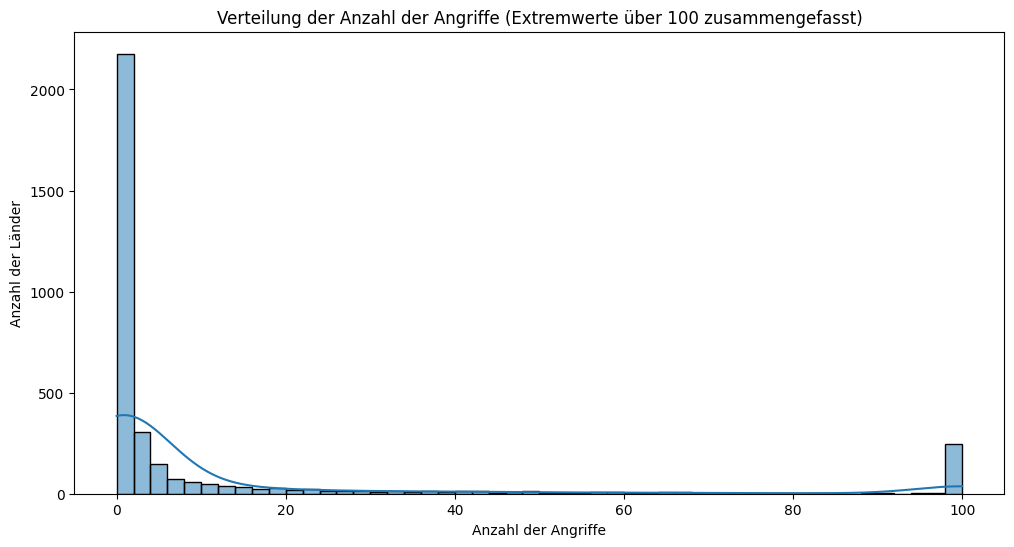

In [16]:
# Histogramm erstellen, Werte auf maximal 100 begrenzen
plt.figure(figsize=(12, 6))
sns.histplot(df_merged['attack_count'].clip(upper=100), bins=50, kde=True)
plt.title('Verteilung der Anzahl der Angriffe (Extremwerte über 100 zusammengefasst)')
plt.xlabel('Anzahl der Angriffe')
plt.ylabel('Anzahl der Länder')
plt.show()

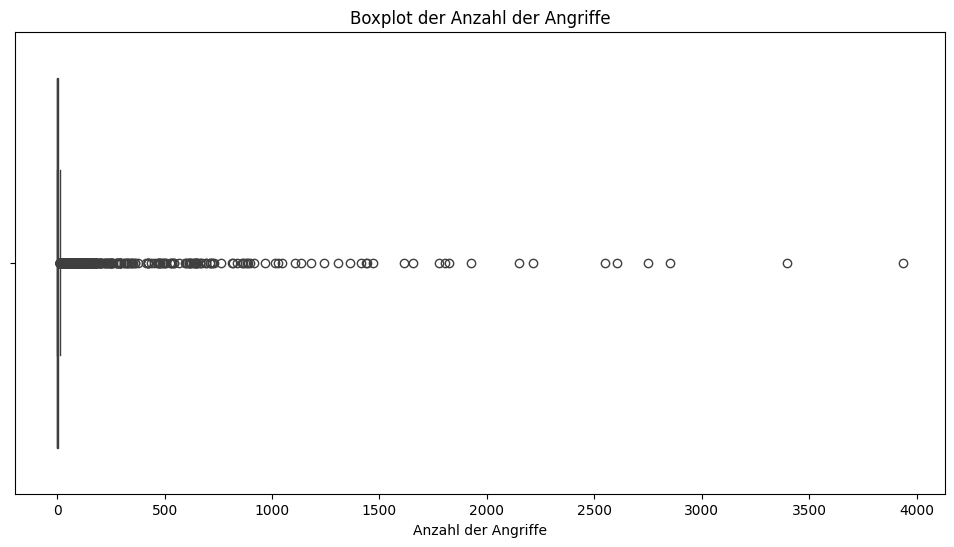

In [17]:
# Boxplot erstellen
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='attack_count')
plt.title('Boxplot der Anzahl der Angriffe')
plt.xlabel('Anzahl der Angriffe')
plt.show()

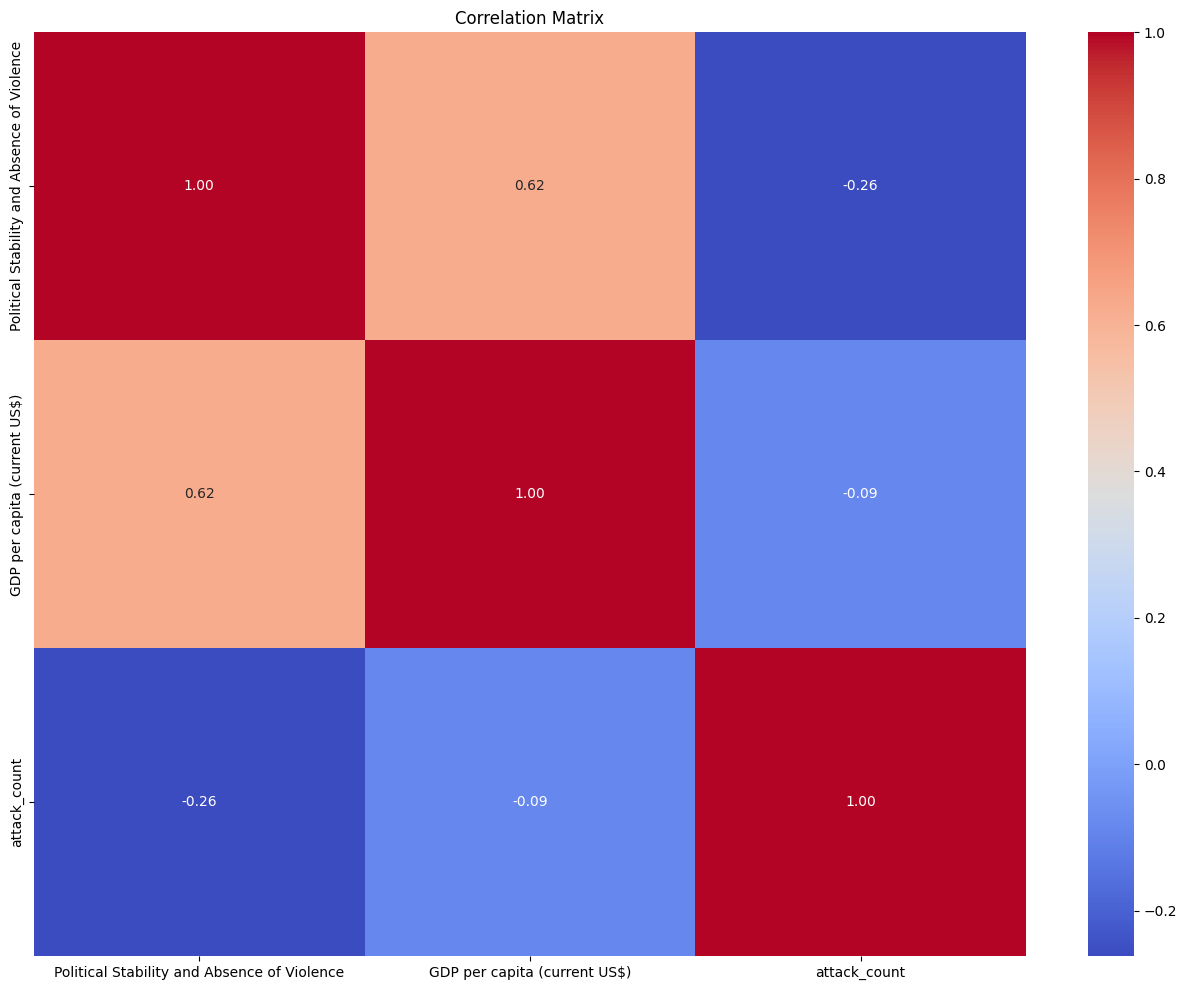

In [18]:
# Correlation Matrix erstellen abzüglich der Spalten "Country Name" und "Year"
corr = df_merged.drop(['Country Name', 'Year'], axis=1).corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Es besteht eine moderate negative Korrelation zwischen "Political Stability and Absence of Violence" und "attack_count".    
Je instabiler ein Land, desto höher die Anzahl der Angriffe.   

Die Korrelation zwischen "Political Stability and Absence of Violence" und "GDP per capita" deutet darauf hin, dass diese Variablen teilweise zusammenhängen.  
Hier liegt also eine Kollinearität vor.


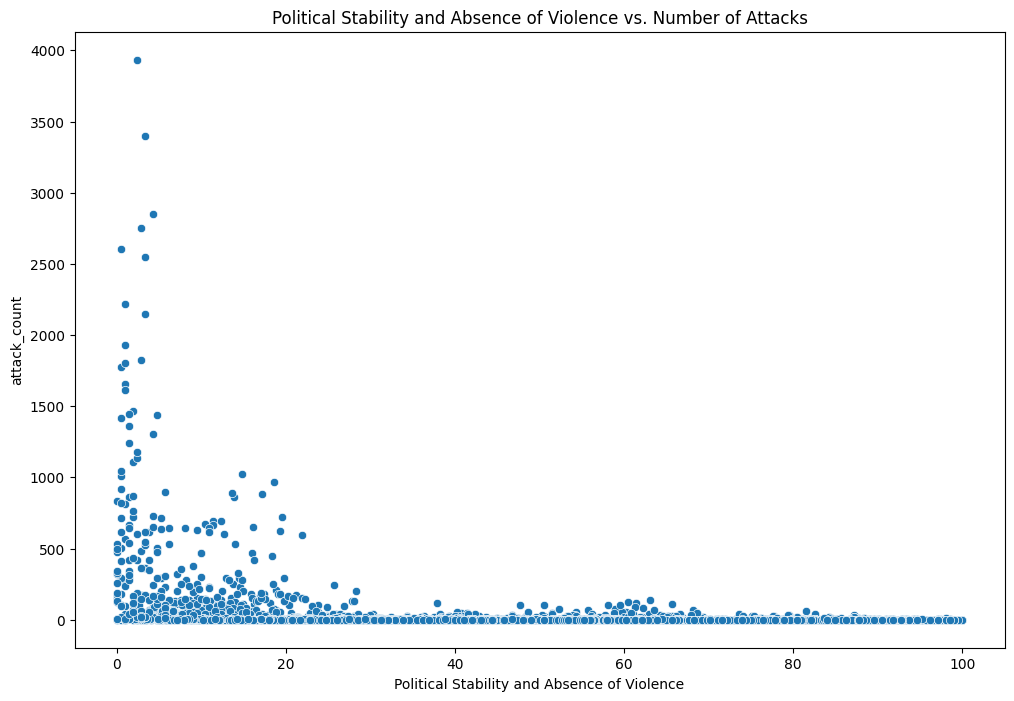

In [19]:
# Scatterplot von "Political Stability and Absence of Violence" und "attack_count"
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Political Stability and Absence of Violence', y='attack_count', data=df_merged)
plt.title('Political Stability and Absence of Violence vs. Number of Attacks')
plt.show()

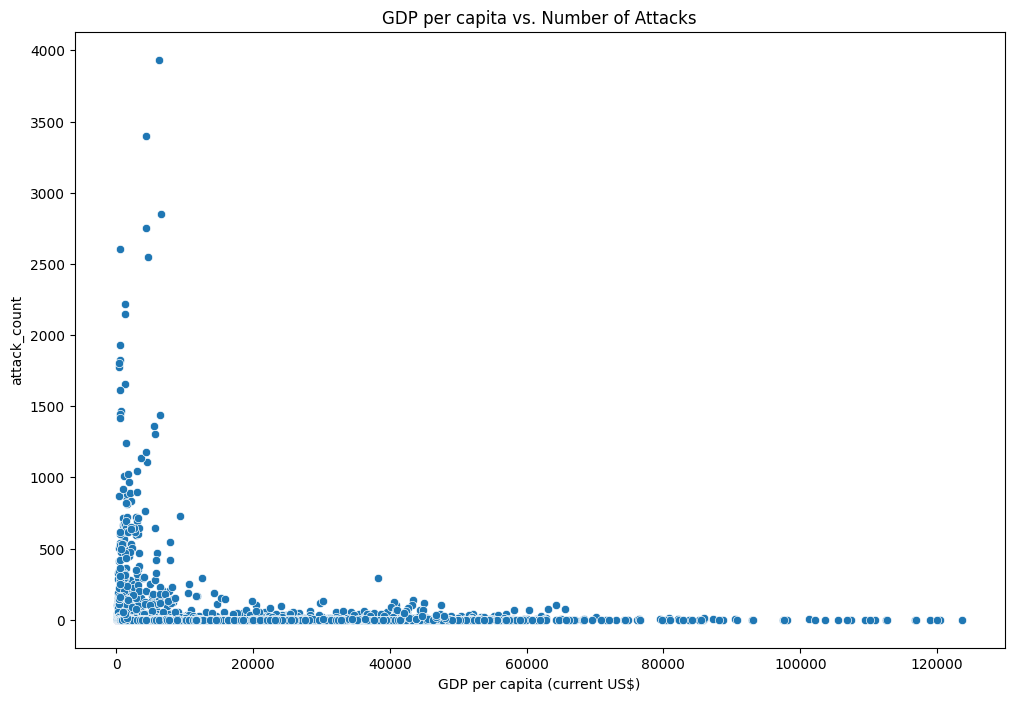

In [20]:
# Scatterplot von "GDP per capita (current US$)" und "attack_count"
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GDP per capita (current US$)', y='attack_count', data=df_merged)
plt.title('GDP per capita vs. Number of Attacks')
plt.show()

In [21]:
grouped = df_merged.groupby(df_merged['attack_count'] > 0)[
    ['GDP per capita (current US$)', 'Political Stability and Absence of Violence']
].mean()
print(grouped)

              GDP per capita (current US$)  \
attack_count                                 
False                         13216.246287   
True                          11470.388905   

              Political Stability and Absence of Violence  
attack_count                                               
False                                           56.821691  
True                                            32.660212  


Länder/Jahre ohne Terrorangriffe haben ein durchschnittlich höheres BIP pro Kopf (~13.216 USD) im Vergleich zu Ländern/Jahren mit Terrorangriffen (~11.470 USD).   

Länder/Jahre ohne Terrorangriffe weisen eine deutlich höhere durchschnittliche politische Stabilität (~56.82) auf, während Länder/Jahre mit Terrorangriffen eine niedrigere Stabilität (~32.66) zeigen.      

In [22]:
# DataFrame so erwietern, das es für jeden Monat eines Jahres eine Zeile gibt
months = range(1, 13)  # Alle Monate
index = pd.MultiIndex.from_product([countries, years, months], names=["Country Name", "Year", "Month"])
full_df = pd.DataFrame(index=index).reset_index()

# Zusammenführen der Daten
df_attacks_month = pd.merge(full_df, df_merged, on=["Country Name", "Year"], how="left")

# Alle Zeilen mit fehlenden Werten in der Spalte "Political Stability and Absence of Violence" oder "GDP per capita (current US$)" entfernen
df_attacks_month = df_attacks_month.dropna(subset=["Political Stability and Absence of Violence", "GDP per capita (current US$)"])

# Daten anzeigen
df_attacks_month

,Country Name,Year,Month,Political Stability and Absence of Violence,GDP per capita (current US$),attack_count
0,Dominican Republic,2000,1,44.973545,2845.846553,0.0
1,Dominican Republic,2000,2,44.973545,2845.846553,0.0
2,Dominican Republic,2000,3,44.973545,2845.846553,0.0
3,Dominican Republic,2000,4,44.973545,2845.846553,0.0
4,Dominican Republic,2000,5,44.973545,2845.846553,0.0
...,...,...,...,...,...,...
51343,South Sudan,2015,8,1.904762,1071.777765,54.0
51344,South Sudan,2015,9,1.904762,1071.777765,54.0
51345,South Sudan,2015,10,1.904762,1071.777765,54.0
51346,South Sudan,2015,11,1.904762,1071.777765,54.0


In [23]:
# Spalte "attack_count" löschen
df_attacks_month.drop(['attack_count'], axis=1, inplace=True)

# Anschläge in df_attacks markieren
df_attacks["attack_occurred"] = 1  # Jede Zeile in der Originaltabelle bedeutet, dass ein Anschlag stattgefunden hat

# df_attacks und df_attacks_month zusammenführen
df_attacks_month = df_attacks_month.merge(df_attacks[["country_txt", "iyear", "imonth", "attack_occurred"]], how='left', left_on=['Country Name', 'Year', 'Month'], right_on=['country_txt', 'iyear', 'imonth'])

# Fehlende Werte in "attack_occurred" mit 0 füllen
df_attacks_month['attack_occurred'] = df_attacks_month['attack_occurred'].fillna(0)

# Spalten "country_txt", "iyear" und "imonth" löschen
df_attacks_month.drop(['country_txt', 'iyear', 'imonth'], axis=1, inplace=True)

# df_attacks_month anzeigen
df_attacks_month

,Country Name,Year,Month,Political Stability and Absence of Violence,GDP per capita (current US$),attack_occurred
0,Dominican Republic,2000,1,44.973545,2845.846553,0.0
1,Dominican Republic,2000,2,44.973545,2845.846553,0.0
2,Dominican Republic,2000,3,44.973545,2845.846553,0.0
3,Dominican Republic,2000,4,44.973545,2845.846553,0.0
4,Dominican Republic,2000,5,44.973545,2845.846553,0.0
...,...,...,...,...,...,...
166800,South Sudan,2015,11,1.904762,1071.777765,1.0
166801,South Sudan,2015,11,1.904762,1071.777765,1.0
166802,South Sudan,2015,12,1.904762,1071.777765,1.0
166803,South Sudan,2015,12,1.904762,1071.777765,1.0


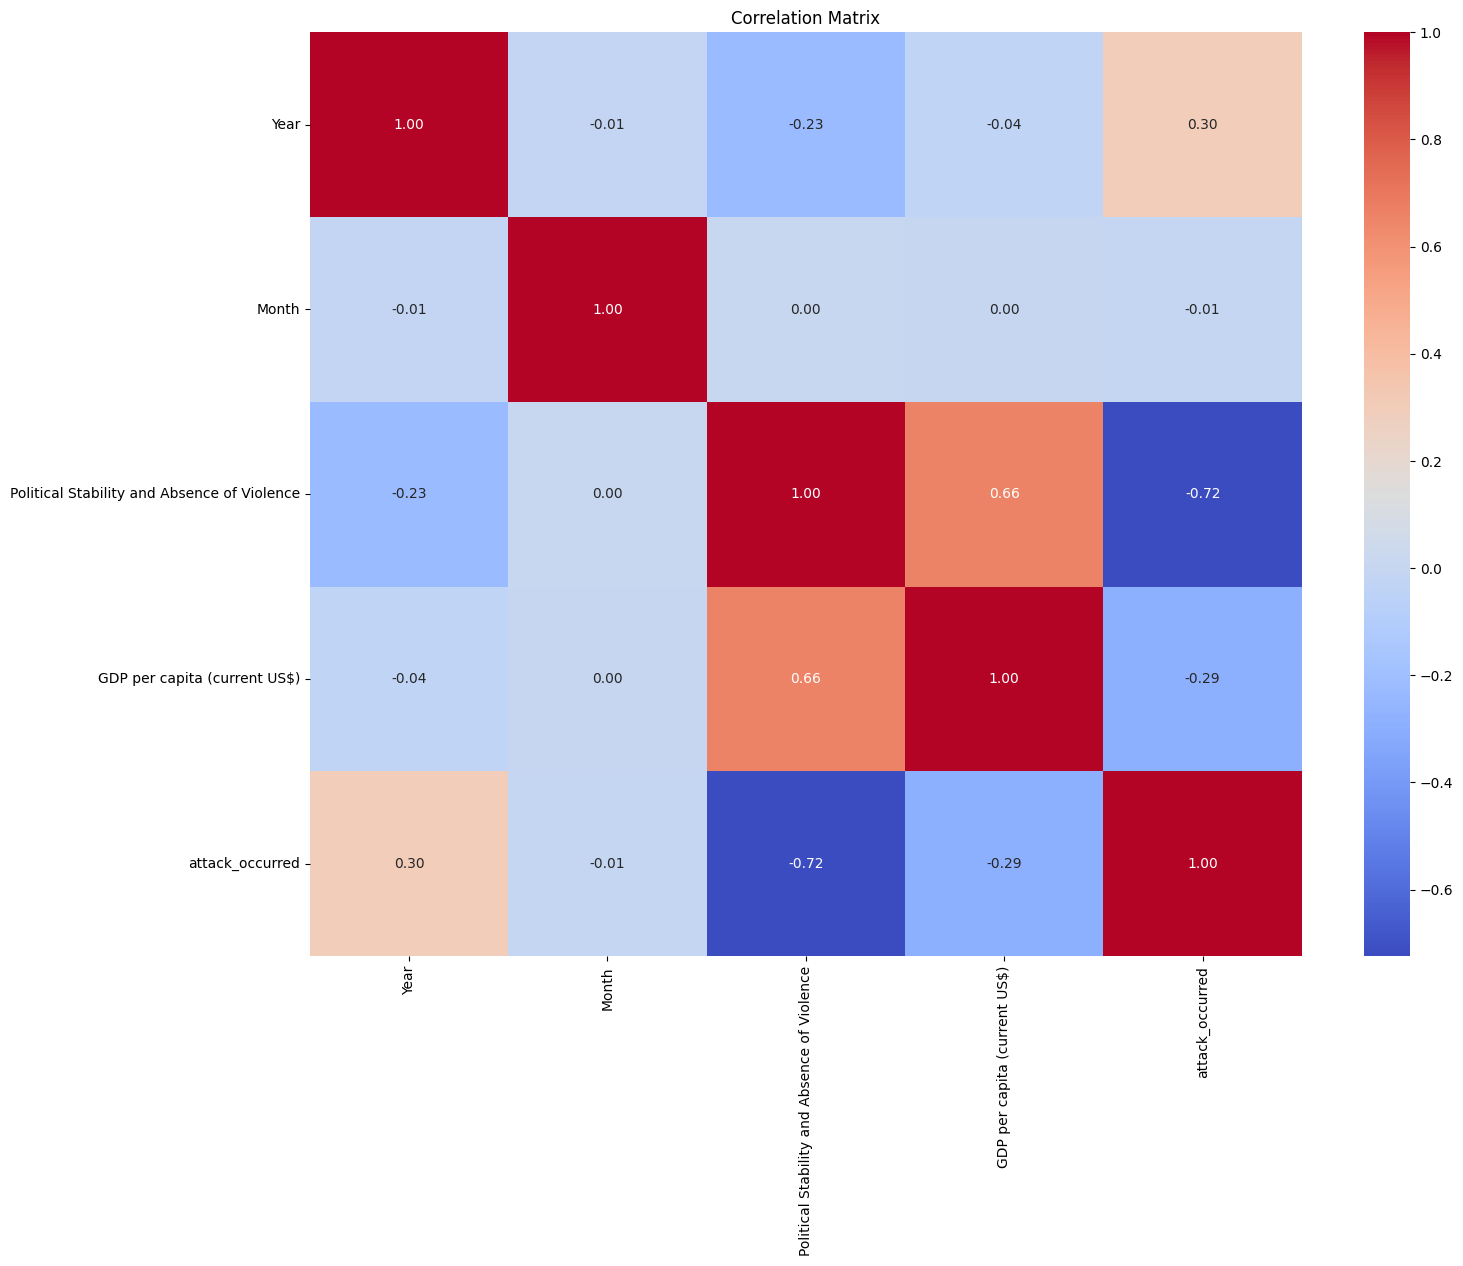

In [24]:
# Korrrelationsmatrix erstellen
corr = df_attacks_month.drop(['Country Name'], axis=1).corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Wird pro Land für jedes Jahr und jeden Monat geprüft, ob ein Angriff stattgefunden hat oder nicht, so ergibt sich eine stärkere Korrelation von -0,72 mit den Werten zur politischen Stabilität.